✅ 成功載入資料！
資料筆數： (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4825
spam     747
Name: label, dtype: int64


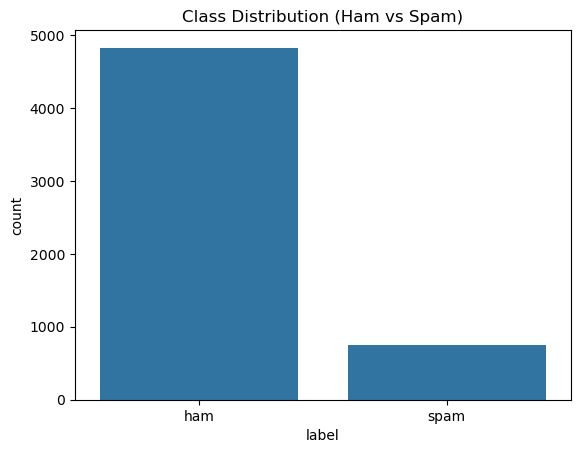

label      0
message    0
dtype: int64


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/lara/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [12]:
# 01_data_preprocessing.ipynb

# ===========================
# 1. 匯入套件
# ===========================
import pandas as pd
import numpy as np
import re
import string
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# 如果第一次執行，請取消註解以下下載資源：
# nltk.download('stopwords')
# nltk.download('wordnet')

# ===========================
# 2. 載入資料（從 GitHub）
# ===========================
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("✅ 成功載入資料！")
print("資料筆數：", df.shape)
display(df.head())

# ===========================
# 3. 初步資料檢查
# ===========================
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Ham vs Spam)')
plt.show()

# 檢查缺失值
print(df.isnull().sum())

# ===========================
# 4. 文字預處理函式
# ===========================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['message'].apply(clean_text)
display(df.head())

# ===========================
# 5. 特徵向量化（TF-IDF）
# ===========================
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = np.where(df['label'] == 'spam', 1, 0)

print("TF-IDF matrix shape:", X.shape)

# ===========================
# 6. 切分訓練與測試集
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

# ===========================
# 7. 儲存處理後資料
# ===========================
os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

joblib.dump((X_train, X_test, y_train, y_test), "data/processed_spam_data.pkl")
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

print("✅ 資料預處理完成，已輸出至 data/processed_spam_data.pkl")

# ===========================
# 8. 額外視覺化（可選）
# ===========================
df['msg_length'] = df['message'].apply(len)
sns.histplot(df, x='msg_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution')
plt.show()
